In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock data from the CSV file
df = pd.read_csv('C:/Users/big_j/PycharmProjects/Automated-Data-Pipeline-for-BI-Reporting/scripts/aapl_stock_data_transformed.csv')

# Display the first few rows of the dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,7_day_moving_avg
0,2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400,NaN
1,2024-09-06,223.949997,225.240005,219.770004,220.820007,220.820007,48423000,NaN
2,2024-09-09,220.820007,221.270004,216.710007,220.910004,220.910004,67180000,NaN
3,2024-09-10,218.919998,221.479996,216.729996,220.110001,220.110001,51591000,NaN
4,2024-09-11,221.460007,223.089996,217.889999,222.660004,222.660004,44587100,NaN


In [14]:
# Summary statistics of the stock data
df.describe()

,Open,High,Low,Close,Adj Close,Volume,7_day_moving_avg
count,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,16.000000
mean,224.219546,226.037727,222.031365,224.409092,224.409092,5.934384e+07,224.463125
std,4.379343,4.417499,4.384050,4.121047,4.121047,5.898119e+07,3.080360
min,215.750000,216.899994,213.919998,216.320007,216.320007,3.288060e+07,220.262859
25%,221.502506,223.204998,218.360001,221.277504,221.277504,3.688622e+07,221.680360
50%,224.959999,227.049995,223.170006,225.940002,225.940002,4.505320e+07,224.247855
75%,227.759995,229.424999,225.215004,227.227497,227.227497,5.815352e+07,227.635357
max,230.039993,233.089996,229.649994,233.000000,233.000000,3.186799e+08,228.102855


In [15]:
# Check for missing values
df.isnull().sum()

Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
7_day_moving_avg    6
dtype: int64

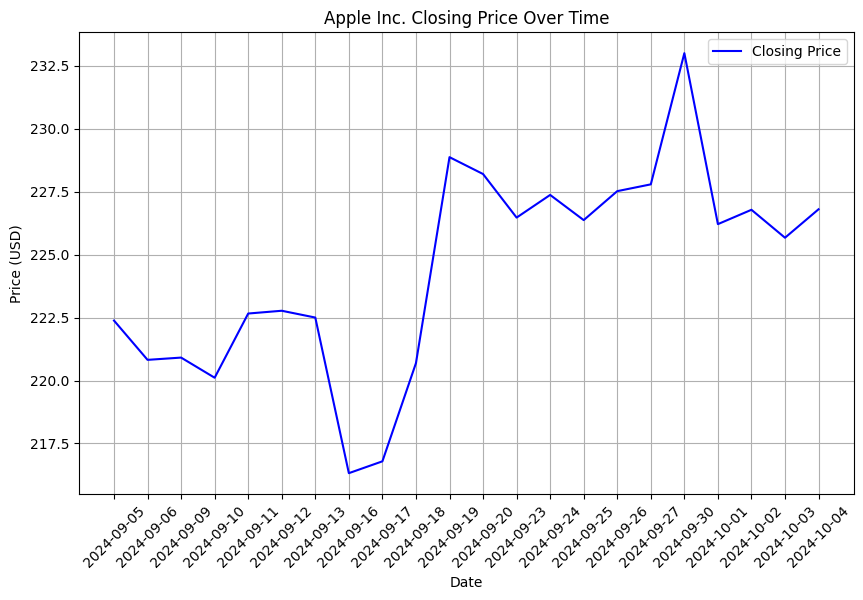

In [16]:
# Plot the 'Close' price over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Apple Inc. Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

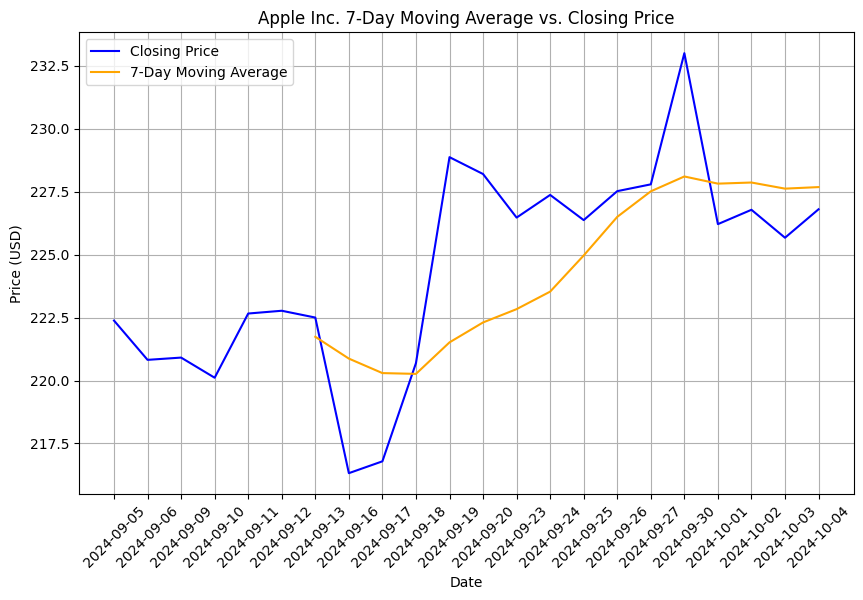

In [17]:
# Plot the 7-day moving average alongside the closing price
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['7_day_moving_avg'], label='7-Day Moving Average', color='orange')
plt.title('Apple Inc. 7-Day Moving Average vs. Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

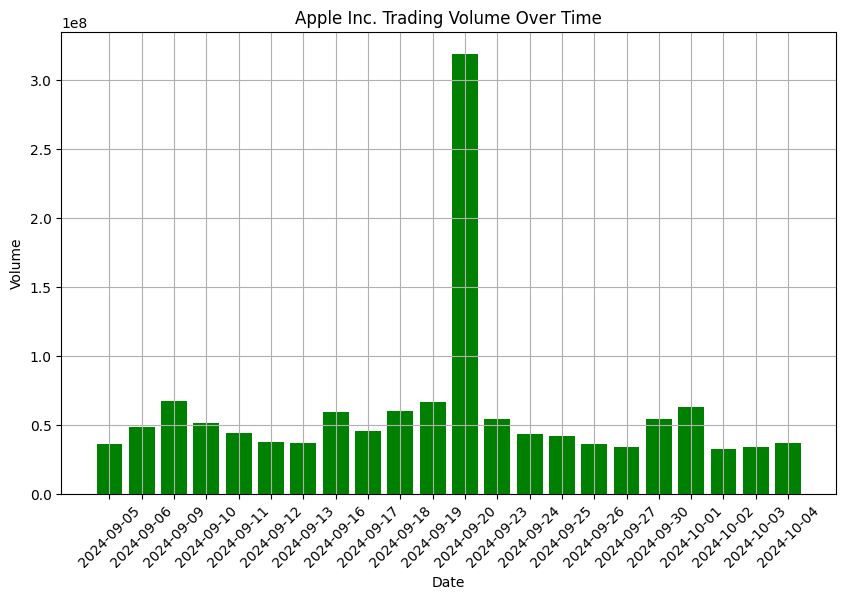

In [18]:
# Plot the trading volume over time
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Volume'], color='green')
plt.title('Apple Inc. Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [19]:
# Calculate correlation between 'Close' price and 'Volume'
correlation = df[['Close', 'Volume']].corr()
print(f"Correlation between Closing Price and Volume:\n{correlation}")

Correlation between Closing Price and Volume:
          Close   Volume
Close   1.00000  0.17371
Volume  0.17371  1.00000


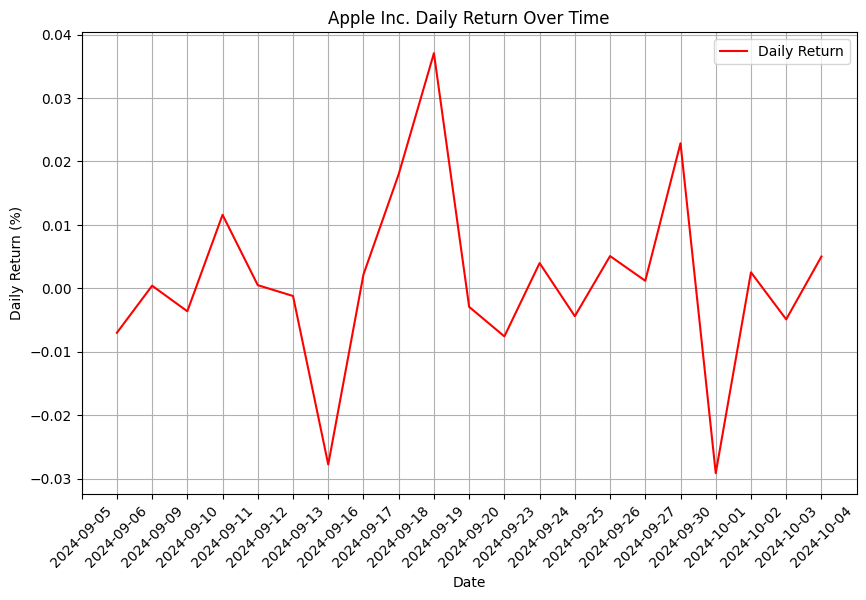

In [20]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Daily Return'], label='Daily Return', color='red')
plt.title('Apple Inc. Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

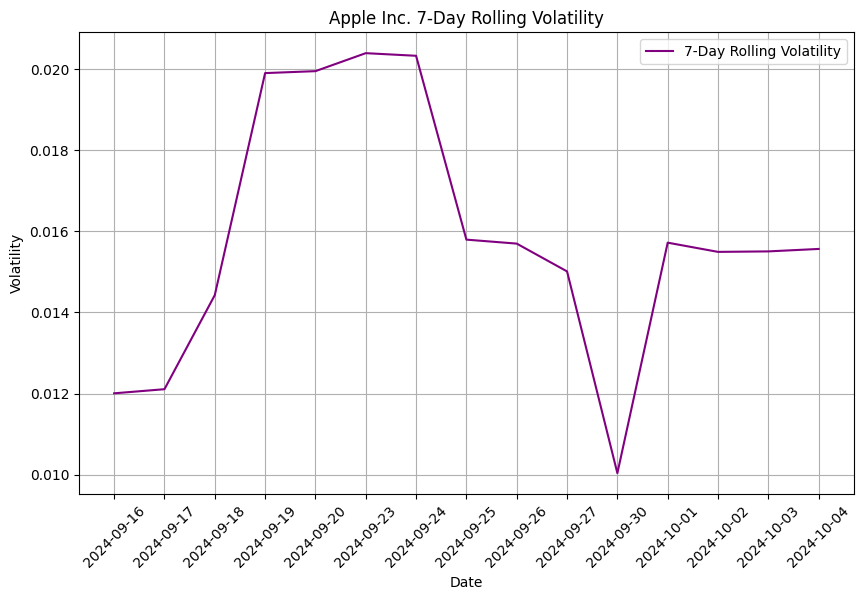

In [21]:
# Calculate the rolling volatility (standard deviation of returns)
df['Rolling Volatility'] = df['Daily Return'].rolling(window=7).std()

# Plot rolling volatility
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Rolling Volatility'], label='7-Day Rolling Volatility', color='purple')
plt.title('Apple Inc. 7-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Save the DataFrame with new columns to a new CSV file
df.to_csv('aapl_stock_data_with_analysis.csv', index=False)
print('Updated dataset saved to aapl_stock_data_with_analysis.csv')

Updated dataset saved to aapl_stock_data_with_analysis.csv
